## Notebook 1 (And Creating the Output for my first Submission)
I am going to first look at the data and see what needs to be cleaned (are there nulls? what are the data types for each columns? etc) and then make my first model to see how I do.

In [1]:
#import all the things we usually use in class 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import warnings; warnings.simplefilter('ignore')
#Warning filter from Patrick's lesson at some point

In [2]:
train = pd.read_csv('./datasets/train.csv')
train.head()
#Loading in the train set to see what I'm working with

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
train.set_index('Id', inplace=True)
#Making the ID the index will make things easier when trying to submit the output dataframe for Kaggle
#Which is just the predicted saleprice and Id

In [4]:
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
#From Chris, to get the whole list of my columns to see which columns I have

In [5]:
train.shape

(2051, 80)

In [6]:
train.isnull().sum()
#Looking to see where the null values are - there are a lot! 
#I will only focus on the ones I want to use

PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC            0
Central Air     

In [7]:
print(train.dtypes)
#Checking the data types to see if they all make sense

PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
B

In [8]:
train.columns
#Checking all column names

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

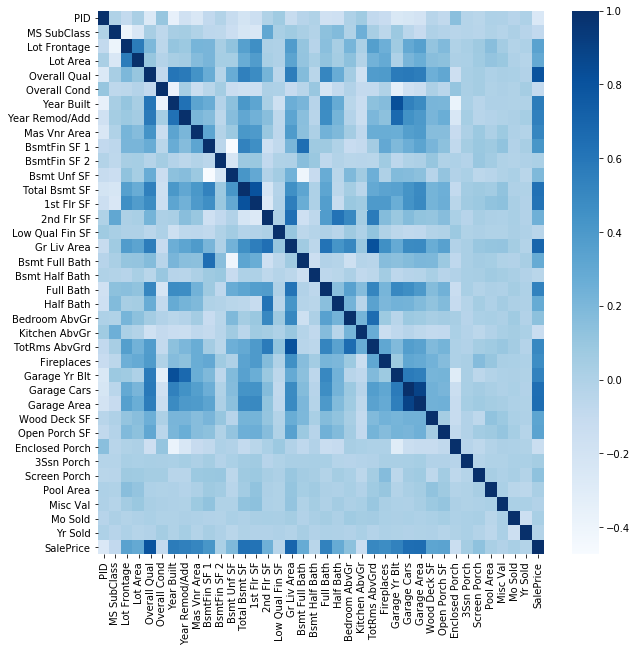

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), cmap='Blues');
#A heat map of all of the columns' correlations, this is too busy
#I will look at the correlations for sale price only

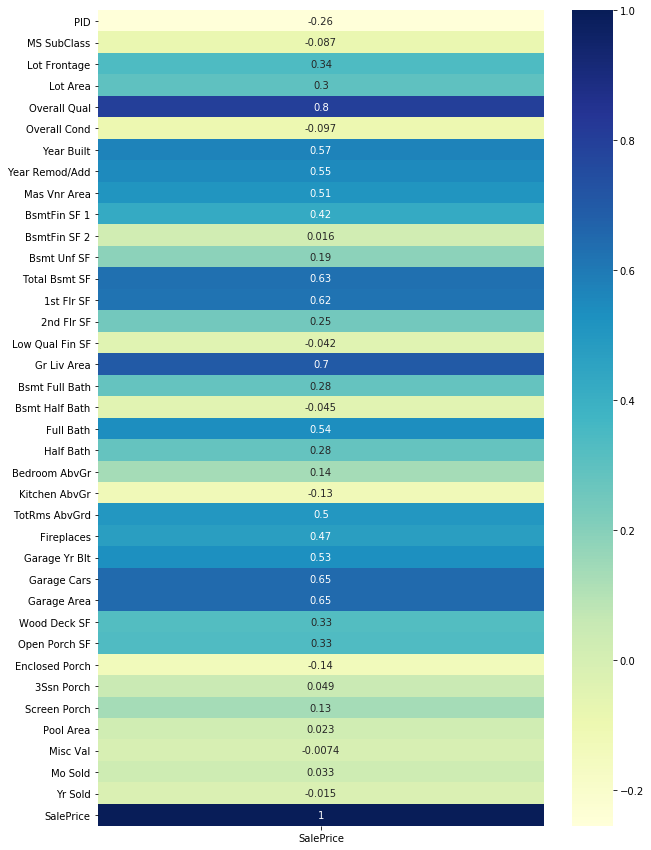

In [10]:
plt.figure(figsize=(10,15))
sns.heatmap(train.corr()[['SalePrice']], annot = True, cmap='YlGnBu');
#Did the heat map but just for the correlation on SalePrice
#This color scheme is easier for me to read/ see which have a strong correlation
#For my first model, I will pick the highest correlated columns to create a linear regression model

### Off the bat, I want to work with:  
    Overall Qual,(0.8)   
    Gr Liv Area, (0.7)   
    Garage Area (0.65) (Garage Cars is equally correlated but area seems more continuous?)   
    Total Bsmt SF, (0.63)
    1st Flr SF (0.62)  
    
### Next I might add:  
    Year Built (0.57)
    Year Remodel/Add (0.55) 
    Full Bath  (0.54)
    TotRms AbvGr (0.5) 
    Garage Yr Blt  (0.53)

### First Round Parameters
Overall Quall -  Ordinal  
   10   Very Excellent  
   9    Excellent  
   8    Very Good  
   7    Good  
   6    Above Average  
   5    Average  
   4    Below Average  
   3    Fair  
   2    Poor  
   1    Very Poor
       
Gr Liv Area - continuous, above ground living SF
     
Garage Area - continuous
    
Total Basement SF - Continuous
    
1st Flr SF - Continuous

In [11]:
train1 = train[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'SalePrice']]
train1.head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,SalePrice
Id,,,,,,
109,6,1479,475.0,725.0,725,130500
544,7,2122,559.0,913.0,913,220000
153,5,1057,246.0,1057.0,1057,109000
318,5,1444,400.0,384.0,744,174000
255,6,1445,484.0,676.0,831,138500


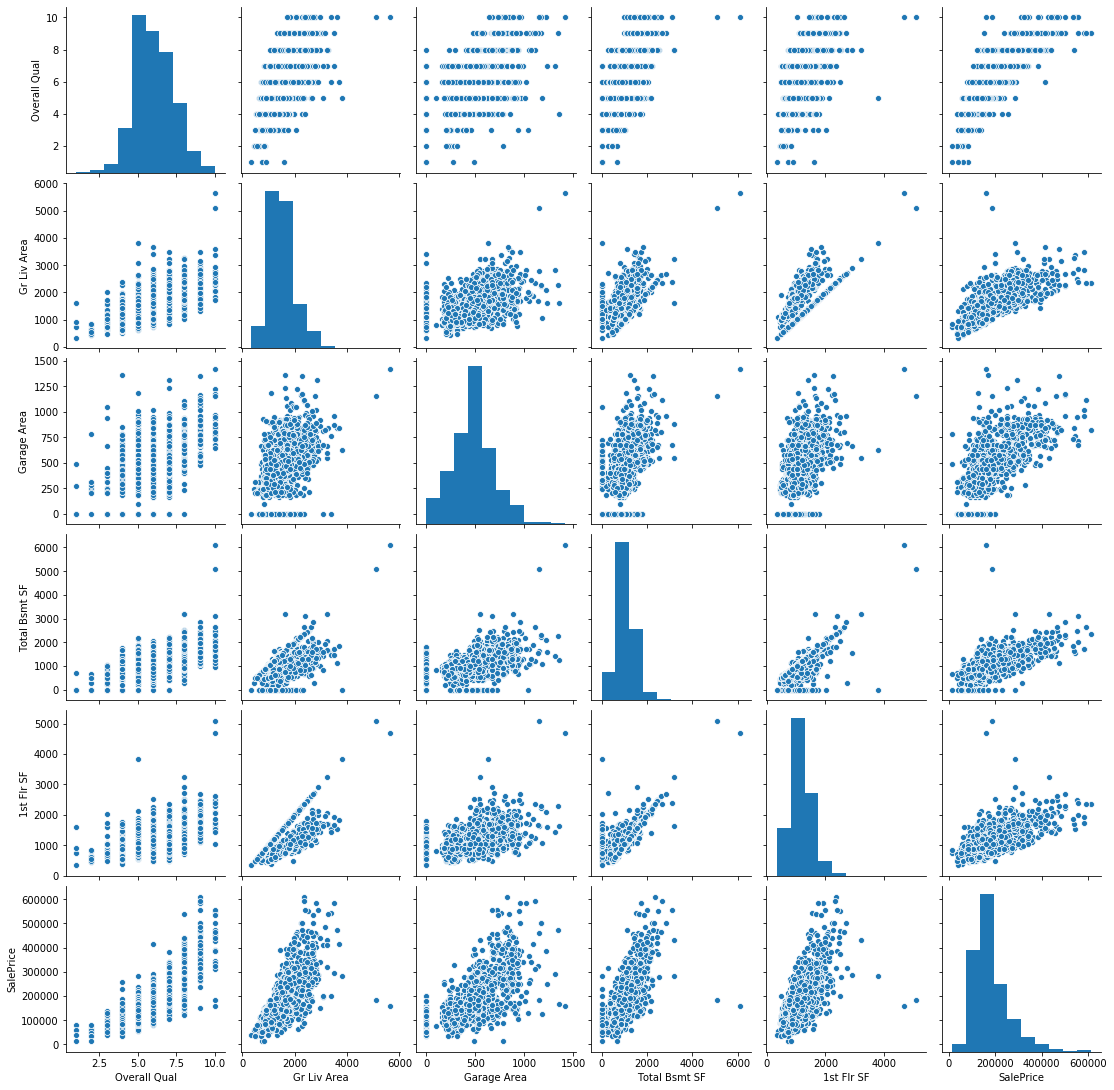

In [12]:
sns.pairplot(train1);
#Let me look at each individual column's correlation with the saleprice

In [13]:
train1.dtypes
#Checking dtypes for my feature columns

Overall Qual       int64
Gr Liv Area        int64
Garage Area      float64
Total Bsmt SF    float64
1st Flr SF         int64
SalePrice          int64
dtype: object

In [14]:
train1.isnull().sum()
#Checking nulls in my feature columns

Overall Qual     0
Gr Liv Area      0
Garage Area      1
Total Bsmt SF    1
1st Flr SF       0
SalePrice        0
dtype: int64

In [15]:
train.drop(train[train['Garage Area'].isnull()].index, inplace=True)
train.shape
#Dropping my null values (this cell and the one below)
#Then checking the shape of the dataframe

(2050, 80)

In [16]:
train.drop(train[train['Total Bsmt SF'].isnull()].index, inplace=True)
train.shape

(2049, 80)

In [17]:
#Creating my X and y for my linear model
X = train[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF']]
y = train['SalePrice']
#Instantiate and fit the model
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#Getting R2 value for my linear model
lr.score(X, y)

0.7770764975486124

In [19]:
#Function to calculate adjusted R2
def r2_adj(x, y, k):
    lr = LinearRegression()
    lr.fit(x, y)
    null_pred=y.mean()
    null_resids = y-null_pred
    null_sse = (null_resids**2).sum()
    pred = lr.predict(x)
    resids = y - pred
    sse=(resids**2).sum()
    r2 = 1-((sse) / (null_sse))
    n = len(y)
    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj
#from lab 3.01

In [20]:
#Function to get all metrics for a model
def run_metrics(x,y, k):
    lr = LinearRegression()
    lr.fit(x, y)
    pred = lr.predict(x)
    resids = y - pred
    r2 = lr.score(x,y)
    mae = metrics.mean_absolute_error(y, pred)
    sse = (resids**2).sum()
    rmse = metrics.mean_squared_error(y, pred, squared=False)
    mse = metrics.mean_squared_error(y, pred)
    r2a = r2_adj(x,y,k)
    print(f'Mean Adjusted errors: {mae}')
    print(f'Sum Squared Errors: {sse}')
    print(f'Mean Square Errors: {mse}' )
    print(f'Root Mean Square Errors: {rmse}')
    print(f'R2: {r2}')
    print(f'Adjusted R2: {r2a}')
#from lab 3.01

In [21]:
#Getting the metrics for my first linear model of this project
run_metrics(X, y, 5)

Mean Adjusted errors: 24778.580042921138
Sum Squared Errors: 2868250658125.2764
Mean Square Errors: 1399829506.1616771
Root Mean Square Errors: 37414.29547862257
R2: 0.7770764975486124
Adjusted R2: 0.776530918736935


In [22]:
#Not too bad for my first model!

In [23]:
#Splitting my data into train and test data so I can see how the model handles new data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [24]:
#Checking the baseline score
y_train_baseline = [y_train.mean()]*len(y_train)
y_test_baseline = [y_train.mean()]*len(y_test)
print(f'Baseline RMSE for training set {metrics.mean_squared_error(y_train, y_train_baseline, squared=False)}')
print(f'Baseline RMSE for testing set {metrics.mean_squared_error(y_test, y_test_baseline, squared=False)}')
#Noah's sample submission

Baseline RMSE for training set 78878.69257001158
Baseline RMSE for testing set 80737.09951270458


In [25]:
#Instantiating and fitting a new linear regression model
#Checking the RMSE for the train and test data to see how both do with the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(f'Train RMSE {metrics.mean_squared_error(y_train, lr.predict(X_train), squared=False)}')
print(f'Test RMSE {metrics.mean_squared_error(y_test, lr.predict(X_test), squared=False)}')
#Noah's sample submission
#They do not seem too far off!

Train RMSE 38121.86942871016
Test RMSE 34440.82135224336


In [26]:
#Entering the test dataset because I also need to clean that the same way I cleaned my train dataset
test = pd.read_csv('./datasets/test.csv')

In [27]:
test.set_index('Id', inplace=True)

In [28]:
test = test.loc[:,['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF']] #Noah's sample
test.head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF
Id,,,,,
2658,6,1928,440,1020,908
2718,5,1967,580,1967,1967
2414,7,1496,426,654,664
1989,5,968,480,968,968
625,6,1394,514,1394,1394


In [29]:
test.isnull().sum()

Overall Qual     0
Gr Liv Area      0
Garage Area      0
Total Bsmt SF    0
1st Flr SF       0
dtype: int64

In [30]:
#does not need to be cleaned this time around!

In [31]:
test['SalePrice'] = linreg.predict(test)
#Make the sale price column and predict the sale price from my model

In [32]:
test.head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,SalePrice
Id,,,,,,
2658,6,1928,440,1020,908,188497.150765
2718,5,1967,580,1967,1967,205933.254035
2414,7,1496,426,654,664,186557.792393
1989,5,968,480,968,968,127913.926250
625,6,1394,514,1394,1394,186580.265863


In [34]:
test.shape

(878, 6)

In [ ]:
#Make my dataframe to submit to Kaggle
output1 = test[['SalePrice']]
output1.head()

In [ ]:
#Save the dataframe to submit to Kaggle
output1.to_csv('./datasets/dana_submission_1.csv')

In [ ]:
train.to_csv('./datasets/train1.csv')
#Saving cleaning work - I dont want to save over the original data

In [ ]:
#Checking my coefficiants
linreg.coef_

In [ ]:
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF']
train_coefs = train[features]
train_coefs.head()
coefs = pd.DataFrame({'column': train_coefs.columns, 'coef': linreg.coef_})
coefs
#Coef dictionary to see how each predicts the sale price

## Summary
I did my first round of data cleaning and picked a few parameters based off of their correlation to the sale price. I ran a multiple linear regression model and then split my data into train and test data to see how the model I created handles new data. 

I saved my cleaning to a new train dataset and I also saved my first output to submit.